### In Clash Royale's triple draft mode, what spell cards are the best choices?
##### (Originally a Creative Final Project for Econ 143 at UC Berkeley)

In [66]:
# Setup Cell

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
import time
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

np.set_printoptions(threshold=np.inf)

Sources to data: provided in the following jupyter notebook to this: Creating the Data

### Background to Clash Royale

[Clash Royale](https://supercell.com/en/games/clashroyale/) is a popular strategic mobile game that features a battle between two players. In brief, each player's objective is to take down as many of their opponent's 3 towers in a 3-6 minute span, hence winning the game. Players play in real-time, which means players may play moves simulatenously. In other words, there is no set order to moves, unlike a turn-based game like Chess. 

To gain a strategic advantage over their opponent, a player chooses a deck that consists of 8 cards. Cards in Clash Royale are for the most part, not directly comparable to each other, as there are several features that differentiate cards from one another. This is similar to how a banana is priced lower than a MacBook, but provides more nutritional benefits. 




An example of gameplay:

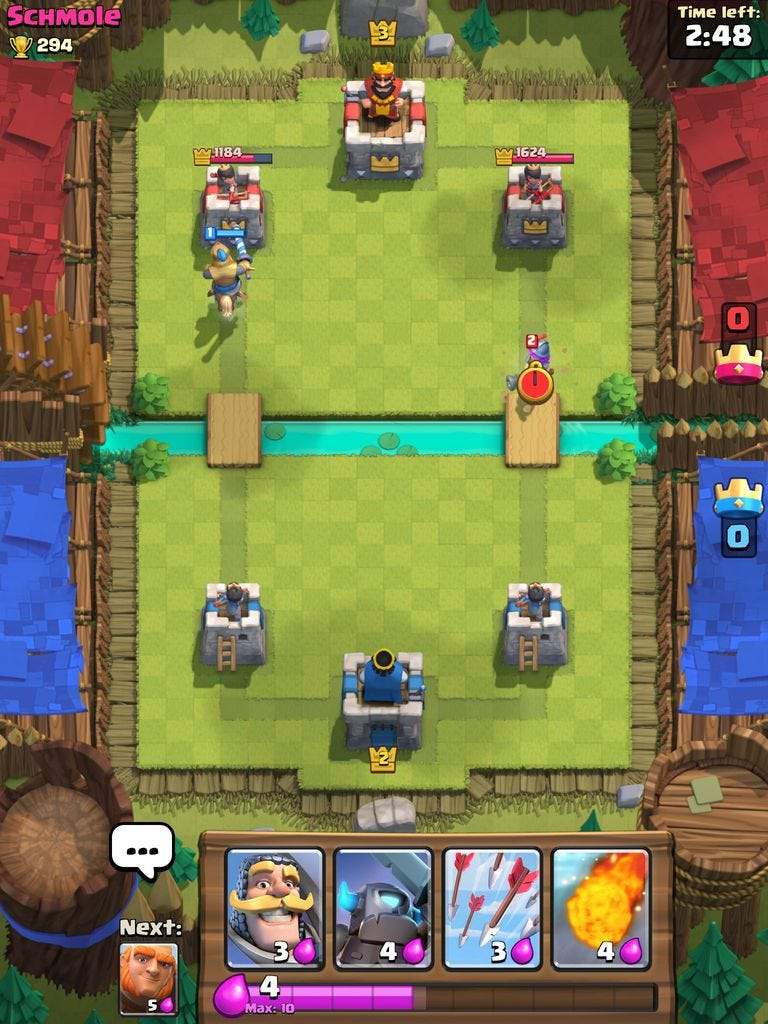

In [67]:
from IPython.display import Image
image_path = 'gameplay_1.jpeg'
Image(filename=image_path)

A big issue in Clash Royale is the existence of inequalities that players face before starting a match. For highly-skilled Clash Royale players, certain decks will offer disproportionately significant advantages over others, in comparison to the effects of being at a higher skill level. In addition, this relationship is not transitive. This means that while most of the time deck A > deck B and deck B > deck C, it isn't always the case that deck A > deck C. As a result, a game's outcome is severely affected on the deck combinations a player chooses.

In summary, winning in Clash Royale can be largely attributed to chance, which hugely diminishes the impact of skill level on winning. (If I can beat Roger Federer in a tennis match 25% of the time, who's to say I can't win Wimbledon?) Fortunately, Clash Royale offers various modes that are designed to ensure equality between equally-skilled players, one of which I have chosen to analyze deeper below.

### A Brief Background into Triple Draft Mode:

In Clash Royale's Triple Draft Mode, each of the two players are faced with 8 choices. They are presented with 3 cards and select 1 card to add to their deck, while trashing the other cards. In total, they choose 4 cards by themselves, and are forced to take 4 cards as given by their opponent. It should be noted that under this mode, only 16 cards are actually available from the players to pick from. 

In this manner, Triple Draft Mode provides an excellent microcosm to analyze Clash Royale under. First, we see that all the cards (even the bad ones) will appear for selection, as they are randomly selected. This removes any survivorship bias that may have existed, as the distribution of cards should be uniformly distributed. Second, players have a limited amount of options for creating their deck. This means that the aforementioned advantage that a deck has over another is largely a function of better choice making by 1 player. Third, the amount of synergy cards have is limited, due to there only being 24 possible draft choices among both players. It becomes easier to isolate the impact that individual cards have on winning a match.

As a result, the winning player will probably be the one who makes better choices in creating their deck and plays a better match. Draft Mode provides a fair(er) playing field for a competitive match and thus a good starting point for analyzing Clash Royale.

An example of a draft choice between spells:

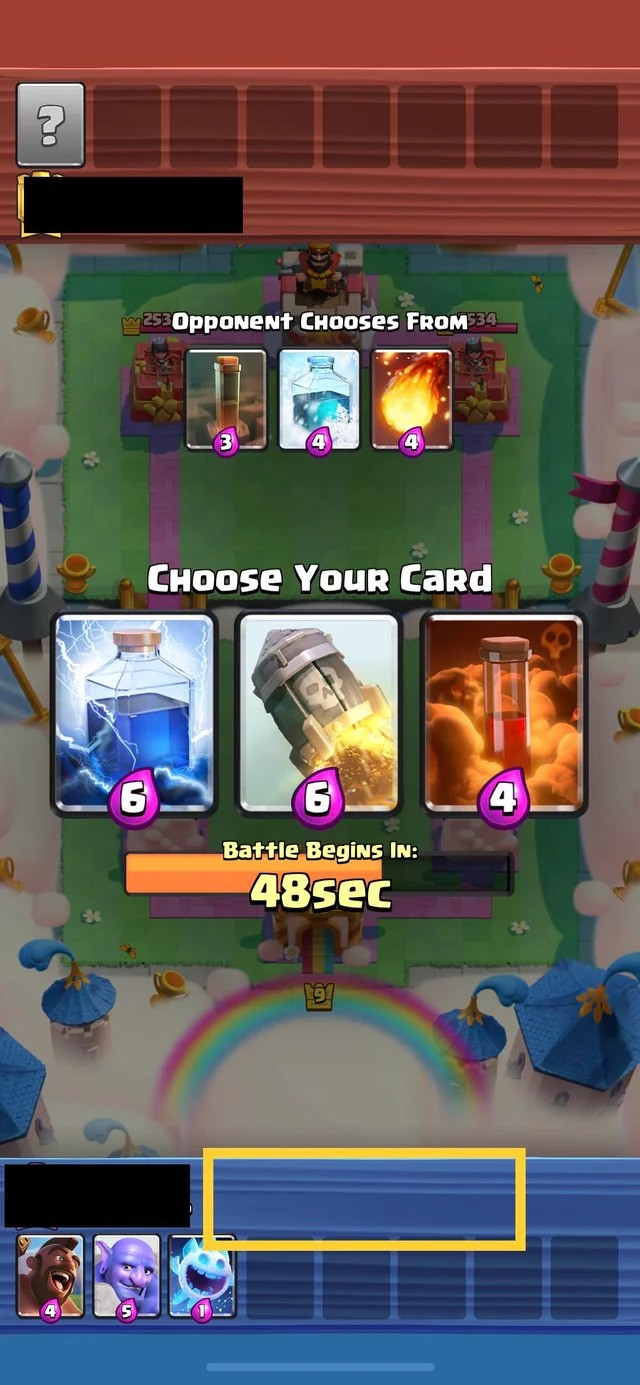

In [68]:
image_path = 'tripdraft.jpeg'
Image(filename=image_path)

<img src="tripledraftjpg.webp" alt="Draft Choice" width="200" height="400">

## Analysis

#### Main Research Question: What spells are better choices than others? Can we quantify the impact of choosing one over the other?

To win a match in Clash Royale, it's important to building the best possible deck before entering a match. By determining which cards are the best, we can therefore increase our chances of winning. 

However, as previously mentioned, cards are often not directly comparable, much like apples and oranges. So, I've decided to limit the analysis to comparing a type of card (Spells).

There are currently 14 spell cards that do direct damage (excluding Void as it was recently added): Arrows, Zap, Giant Snowball, Royal Delivery, Fireball, Rocket, Earthquake, Lightning, Freeze, Barbarian Barrel, Poison, Rage, Tornado, and The Log. All of these spell cards can be reasonably interchanged with each other in draft mode in various contexts.

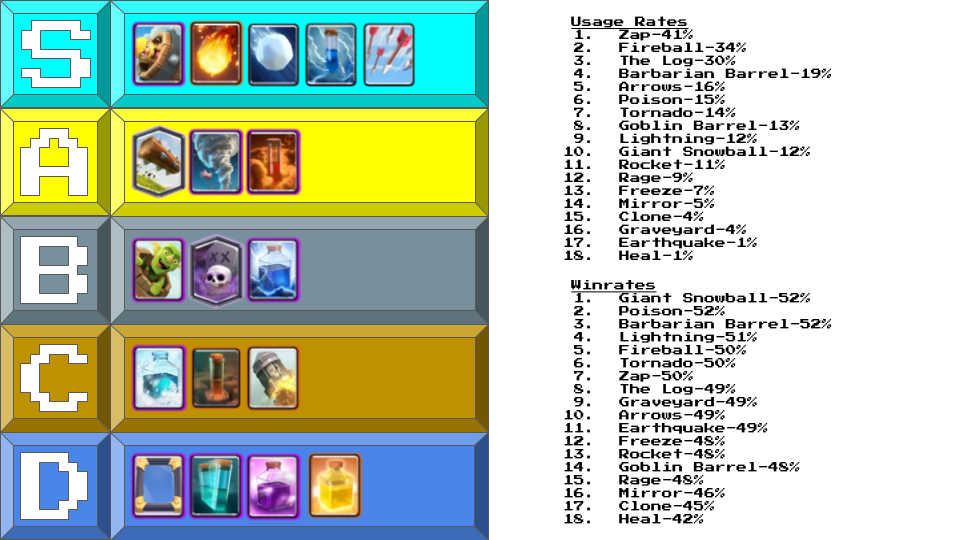

In [69]:
image_path = 'tierlist.png'
Image(filename=image_path)

* The importance of spells in Clash Royale is very crucial, so much so that players are in constant debate over which ones are the best. Source: [Spells Tier List - Reddit](https://www.reddit.com/r/ClashRoyale/comments/bzsrfi/spells_tier_list/)

### Data

The dataset I used includes the results of 306246 matches played:
* column "presult": 0 if the match was won, 1 if the match was lost. (Note: There are equal numbers of 0s and 1s in this dataset.)
* ptag: the player who played this match

The next 14 columns are boolean values that gather whether a spell was played in a match or not: 0 if no, 1 if yes. 

* expLevel: A player's account level: A good indicator of how long a player has been playing the game, or how much experience they have.  
* trophies: The number of trophies a player has: A good indicator of the skill of a player. For instance, a comparatively low expLevel but high trophy level indicates that the player is really good, while a comparatively high expLevel but low trophy level indicates that the player is bad.
* num_spells_used: How many of the 14 spells did a player use? Calculated by summming up the boolean columns. 

In [70]:
df = pd.read_csv("triple_draft_data.csv")
df["num_spells_used"] = df.drop(df.columns[[0, 1, 2, -2, -1]], axis = 1).sum(axis=1)
print(df.shape)
df.head()
# 153123 unique matches: 2 rows for each match (306246 total) since each match has a winner and a loser

(306246, 20)


,Unnamed: 0,presult,ptag,fireball_bool,arrows_bool,rage_bool,rocket_bool,freeze_bool,lightning_bool,zap_bool,poison_bool,the_log_bool,tornado_bool,earthquake_bool,barbarian_barrel_bool,snowball_bool,royal_delivery_bool,expLevel,trophies,num_spells_used
0,0,0,PRQJRGJ8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,5518,0
1,1,1,P2C2CCQ2V,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,6487,1
2,2,1,9JVCJ92V9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,13,6600,2
3,3,1,Y82RVYPC8,0,1,1,0,0,0,0,1,0,0,0,0,0,0,13,5695,3
4,4,1,Y89UL2JL,0,0,0,0,0,0,0,1,0,0,0,0,0,0,13,5885,1


Data Exploration

In [82]:
# Summary Statistics for the data


'''
Interpretations:
* The mean displays the usage rate of the 14 spells. We see that the arrows are most commonly used in matches at 22.64%, while the freeze is used the least at 2%. 
* We see from the percentiles that a majority of players use above 2 spells in a deck. One player even used 6!
* The percenitles also show that our data is mostly comprised of high level players: as most are level 13 and have a high trophy count.  
'''

df.describe()

,Unnamed: 0,presult,fireball_bool,arrows_bool,rage_bool,rocket_bool,freeze_bool,lightning_bool,zap_bool,poison_bool,the_log_bool,tornado_bool,earthquake_bool,barbarian_barrel_bool,snowball_bool,royal_delivery_bool,expLevel,trophies,num_spells_used
count,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000,306246.000000
mean,153122.500000,0.537117,0.209322,0.226419,0.027289,0.053741,0.022743,0.191741,0.139845,0.214703,0.206830,0.070956,0.125249,0.153289,0.103058,0.078927,12.928531,5915.364981,1.824112
std,88405.749607,0.498621,0.406825,0.418514,0.162923,0.225506,0.149084,0.393671,0.346827,0.410617,0.405034,0.256752,0.331002,0.360266,0.304035,0.269625,0.315888,284.954935,0.743603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1275.000000,0.000000
25%,76561.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,5749.000000,1.000000
50%,153122.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,5877.000000,2.000000
75%,229683.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,6023.000000,2.000000
max,306245.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,7221.000000,6.000000


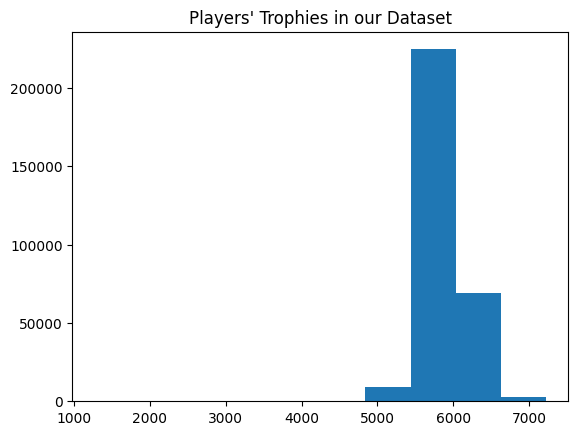

In [72]:
# Skill level of players
plt.hist(df["trophies"])
plt.title("Players' Trophies in our Dataset") ;

# Our dataset includes highly skilled players - good, since they care more for optimal play than an inexperienced or casual player.

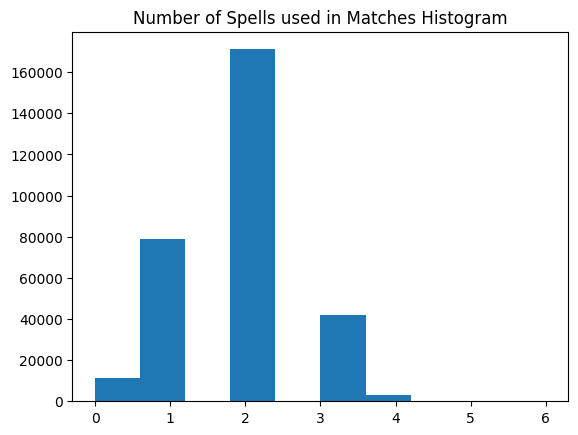

In [73]:
plt.hist(df["num_spells_used"])
plt.title("Number of Spells used in Matches Histogram");

# 2 is the mode -> Most players like to select 2 spells 

<Axes: >

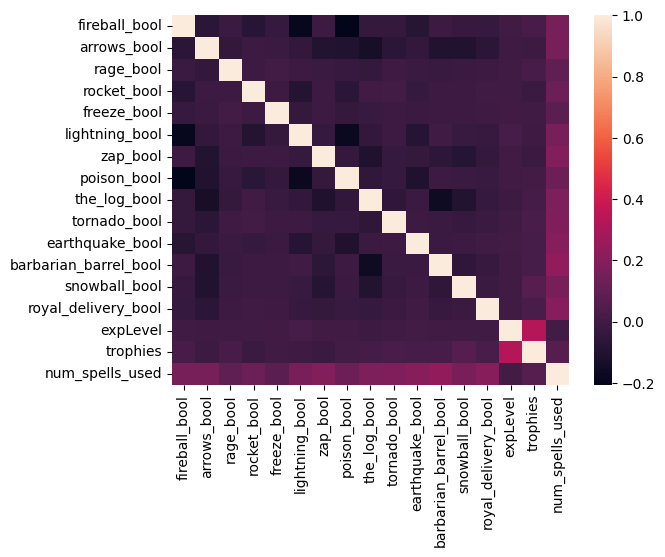

In [74]:
correlation_matrix = df.drop(df.columns[[0, 1, 2]], axis = 1).corr()
sns.heatmap(correlation_matrix)

# Close to no correlation between any variables: As desired, choices of cards are largely independent. 
# This assumption is important when interpreting the results, as we focus on the impact of individual choices. 
# num_spells is a sum of the boolean variables (which is by default related.)

In [75]:
df.drop(df.columns[[0, 1, 2]], axis = 1).sum(axis=0)
# Marginals of the columns: Arrows, Poisson, Fireball, and the Log are the most commonly picked cards among this sample of games.

fireball_bool                 64104
arrows_bool                   69340
rage_bool                      8357
rocket_bool                   16458
freeze_bool                    6965
lightning_bool                58720
zap_bool                      42827
poison_bool                   65752
the_log_bool                  63341
tornado_bool                  21730
earthquake_bool               38357
barbarian_barrel_bool         46944
snowball_bool                 31561
royal_delivery_bool           24171
expLevel                    3959311
trophies                 1811556864
num_spells_used              558627
dtype: int64

Understanding the Data:
* Arrows, Poisson, Fireball, and the Log being the most commonly picked cards in this game mode isn't surprising. All 4 choices are very robust: choosing these cards are often regarded as a safe choice, which will not automatically lose or win you the game. 

* The mode of the spells chosen histogram is 2. Players like to reserve 2 out of their 8 deck slots for spells in order to build a flexible deck.

## Methodology: Logistic Regression

My goal with this data was to determine which spell choices contribute most to winning in Clash Royale. To do so, I did a logistic regression. 


Independent Variable: 
- "presult" column with 0s and 1s - whether the player won or not

Dependent Variables:
- All other numerical variables in the dataset, except for fireball_bool: to ensure linear independence between variables.

In [76]:
# Logistic Regression

X = df.drop(df.columns[[0, 1, 2, 3]], axis = 1)  # Dropping the first 4 columns
X = sm.add_constant(X)     # Adding a constant: Origin is unrealistic
y = df["presult"]          # Dependent Variabel: Outcome of the Match

model = sm.Logit(y, X)     # Logistic Regression Model trained on y, X
result = model.fit()       # Fitting the model

print(result.summary())    # Outputs regression table of model results

Optimization terminated successfully.
         Current function value: 0.688254
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                presult   No. Observations:               306246
Model:                          Logit   Df Residuals:                   306229
Method:                           MLE   Df Model:                           16
Date:                Thu, 09 May 2024   Pseudo R-squ.:                0.003093
Time:                        16:42:10   Log-Likelihood:            -2.1078e+05
converged:                       True   LL-Null:                   -2.1143e+05
Covariance Type:            nonrobust   LLR p-value:                1.100e-268
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3392      0.152     -8.832      0.000      -1.636      -1.

#### Overall Interpretation & Implications for Strategy:

This regression table provides useful strategic insights for players who want to win more Clash Royale Games:

We see that a couple of spells have positive relationships with winning: arrows, poison, the log, and barbarian barrel. This corresponds nicely with the spells that are most commonly selected by players, which shows that players make good decisions when choosing spells to pick. 

There are also positive relationships with expLevel and trophies: higher skilled players will win more games. In addition, there is a negative relationship with the number of spells to choose. Spells are good, but lmiiting the number to pick is 

We can interpret the coefficients as saying: If I pick this spell and no others, I will have boosted my chances of winning by a proportion of {coeff}. For example, picking arrows corresponds to a coefficient of 0.0986, which means an increase of just under 10% of winning. 

## Methodology 2: Logistic Regression + Quantiles
- Controlling for Trophy Quantiles
- It may be the case that better players (higher trophy counts) prefer different cards.

In [77]:
# Quantiles
print(df["trophies"].quantile(0.25))
print(df["trophies"].quantile(0.50))
print(df["trophies"].quantile(0.75))
print(df["trophies"].quantile(1.00))


5749.0
5877.0
6023.0
7221.0


Hence, I repeated the above process for different quantile groups of players. 

##### Quantile 1: 0 to 25th percentile:

In [78]:
df_1 = df[df["trophies"] <= 5749]

X = df_1.drop(df_1.columns[[0, 1, 2, 3]], axis = 1) 
X = sm.add_constant(X)     
y = df_1["presult"]        

model = sm.Logit(y, X) 
result = model.fit()    
print(result.summary())   

Optimization terminated successfully.
         Current function value: 0.689943
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                presult   No. Observations:                76727
Model:                          Logit   Df Residuals:                    76710
Method:                           MLE   Df Model:                           16
Date:                Thu, 09 May 2024   Pseudo R-squ.:                0.003603
Time:                        16:42:11   Log-Likelihood:                -52937.
converged:                       True   LL-Null:                       -53129.
Covariance Type:            nonrobust   LLR p-value:                 1.442e-71
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3774      0.257     -9.265      0.000      -2.880      -1.

##### Differences and Findings

Among the lower quantile of players, more cards have a positive relationship with winning, such as the lightning. This means that more cards are viable at lower levels.

#### Quantile 2: 25th to 50th percentile:

In [79]:
df_2 = df[(df["trophies"] <= 5877) & (df["trophies"] > 5749)]

X = df_2.drop(df_2.columns[[0, 1, 2, 3]], axis = 1)  
X = sm.add_constant(X)    
y = df_2["presult"]         

model = sm.Logit(y, X)    
result = model.fit()   

print(result.summary())  

Optimization terminated successfully.
         Current function value: 0.689292
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                presult   No. Observations:                76732
Model:                          Logit   Df Residuals:                    76715
Method:                           MLE   Df Model:                           16
Date:                Thu, 09 May 2024   Pseudo R-squ.:                0.002907
Time:                        16:42:12   Log-Likelihood:                -52891.
converged:                       True   LL-Null:                       -53045.
Covariance Type:            nonrobust   LLR p-value:                 4.632e-56
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0747      1.278      0.058      0.953      -2.430       2.

##### Differences and Findings

The findings at this quartile range are largely similar to that of the overall findings, except that there is a positive constant in this case. This means that the use of fireball, our omitted variable for linearity, is even more positive. 

#### Quantile 3: 50th to 75th percentile:

In [80]:
df_3 = df[(df["trophies"] <= 6023) & (df["trophies"] > 5877)]

X = df_3.drop(df_3.columns[[0, 1, 2, 3]], axis = 1) 
X = sm.add_constant(X)   
y = df_3["presult"]         

model = sm.Logit(y, X)    
result = model.fit()    

print(result.summary())   

Optimization terminated successfully.
         Current function value: 0.688612
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                presult   No. Observations:                76323
Model:                          Logit   Df Residuals:                    76306
Method:                           MLE   Df Model:                           16
Date:                Thu, 09 May 2024   Pseudo R-squ.:                0.001773
Time:                        16:42:12   Log-Likelihood:                -52557.
converged:                       True   LL-Null:                       -52650.
Covariance Type:            nonrobust   LLR p-value:                 3.872e-31
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0256      1.193      0.021      0.983      -2.312       2.

##### Differences and Findings

Similar findings to the 25th to 50th percentile range. There are noticeably lower coefficients for most of our variables, which may reveal that choices to winning don't matter as much at this level. 

#### Quantile 4: 75th to 100th percentile:

In [81]:
df_4 = df[(df["trophies"] <= 7221) & (df["trophies"] > 6023)]

X = df_4.drop(df_4.columns[[0, 1, 2, 3]], axis = 1)  
X = sm.add_constant(X)    
y = df_4["presult"]         

model = sm.Logit(y, X)    
result = model.fit()      

print(result.summary())    

Optimization terminated successfully.
         Current function value: 0.684395
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                presult   No. Observations:                76464
Model:                          Logit   Df Residuals:                    76447
Method:                           MLE   Df Model:                           16
Date:                Thu, 09 May 2024   Pseudo R-squ.:                0.002691
Time:                        16:42:13   Log-Likelihood:                -52332.
converged:                       True   LL-Null:                       -52473.
Covariance Type:            nonrobust   LLR p-value:                 1.133e-50
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.5579      0.868      1.795      0.073      -0.144       3.

##### Differences and Findings

Interestingly, this is the only regression output that shows a positive relationship between the number of spells used and winning. For higher level players, more flexibility is offered as a result. 

#### Summary: Limitations to findings:

This data was pulled strictly from 4 days of Clash Royale play in April 2023. Due to the limited data available, this was the best data that I could find in order to answer my question. The game has evolved since then and the game creators have changed attributes of certain cards, making certain cards worse and certain cards better by default. As a result, this makes finding the best cards an ever-evolving process. 


In addition, this data was only compiled from matches involving Clash Royale's triple draft mode. The findings here abstract away the synergy that players can build between certain cards by allowing for the choices of cards to be as independent from one another as possible. Thus, while certain spells may contribute less to winning in draft, these cards may still be good choices in other facets of the game. 



#### Future Improvements

Due to memory / space constraints of my computer, I was unable to analyze more data. Clash Royale is very popular, as evident by the number of matches played in this 4 day span cracking 300,000. This is only data involving one mode of the game as well, which excludes the millions of other matches played in other modes of the game throughout this span. 

In the future, I would like to extend this process out to include more recent data. In addition, I believe more features could've been controlled for when undergoing my logistic regression, such as the number of matches played from each player, as well as the attributes of the spells being analyzed. These variables are also important to determining who wins a Clash Royale match. However, that would require some scraping and API calls, neither of which I had the ability to do this time around.